In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path 
path = r"C:\Users\Megan\Documents\CareerFoundry\Unit 4\InstaCart Python Project"

In [3]:
# Import dataframe 
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8_task_flags.pkl'))

In [4]:
# Check output 
df_combined.head()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,order_frequency_flag
0,2539329,1,1,2,8,11.0,196,1,0,both,...,9.0,Mid-Range Product,Regularly Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,9.0,Mid-Range Product,Least Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,9.0,Mid-Range Product,Least Busy,Most Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,9.0,Mid-Range Product,Least Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,9.0,Mid-Range Product,Least Busy,Most Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer


<AxesSubplot:>

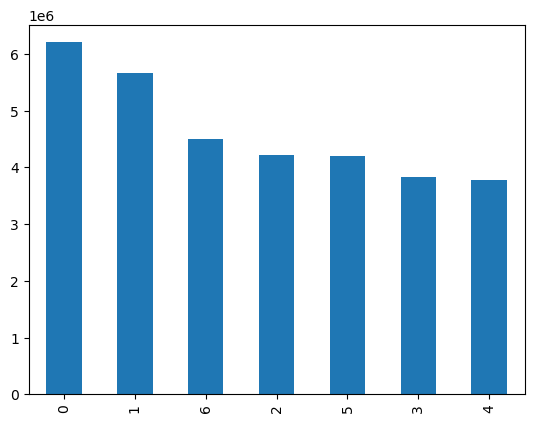

In [5]:
# Create bar chart for order day of week 
df_combined['order_day_of_week'].value_counts().plot.bar()

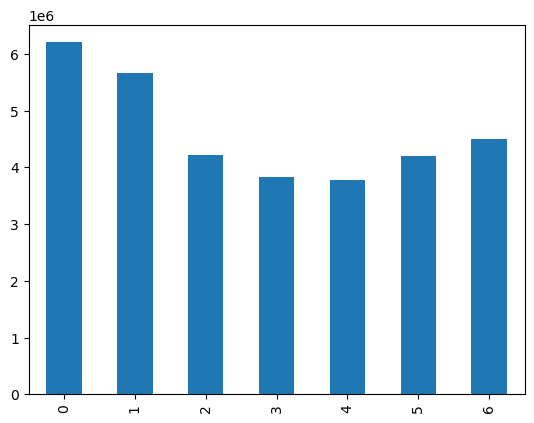

In [6]:
# Sort by day of the week 
bar = df_combined['order_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
df_combined['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

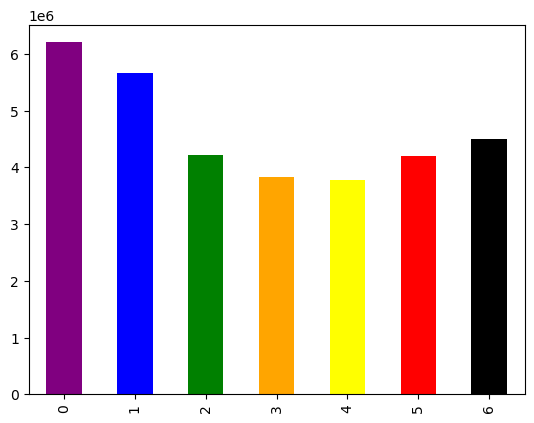

In [8]:
# Add color 
df_combined['order_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','blue','green','orange','yellow','red','black'])

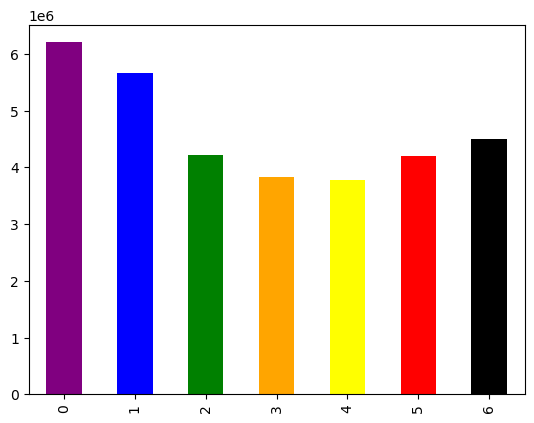

In [9]:
# Save chart with name 
bar = df_combined['order_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','blue','green','orange','yellow','red','black'])

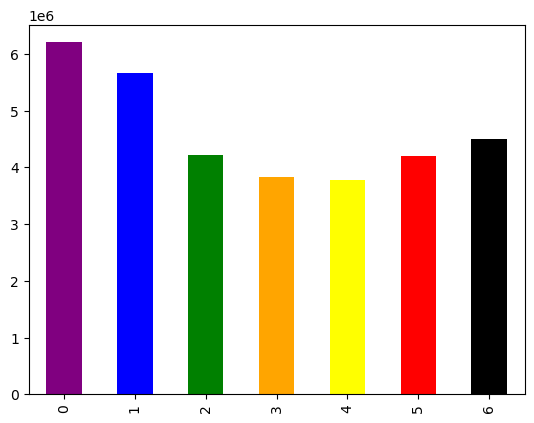

In [10]:
# Recall Chart 
bar.figure

In [11]:
# Export chart to png 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

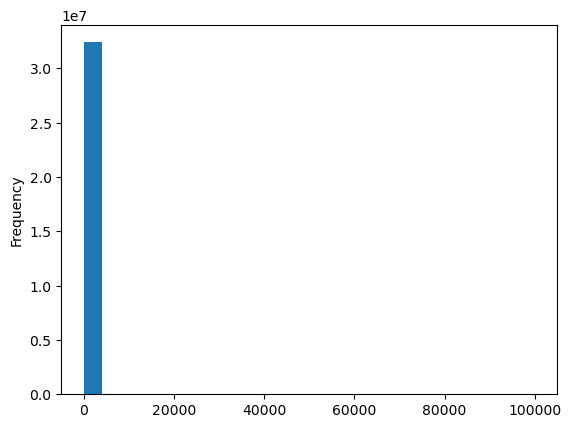

In [12]:
# Create histogram with prices column 
df_combined['prices'].plot.hist(bins = 25)

In [13]:
# Data checks 
df_combined['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
df_combined['prices'].mean()

11.980225638467232

In [15]:
df_combined['prices'].min()

1.0

In [16]:
df_combined['prices'].max()

99999.0

### Massive outlier in the prices column = $99,999

<AxesSubplot:xlabel='prices', ylabel='prices'>

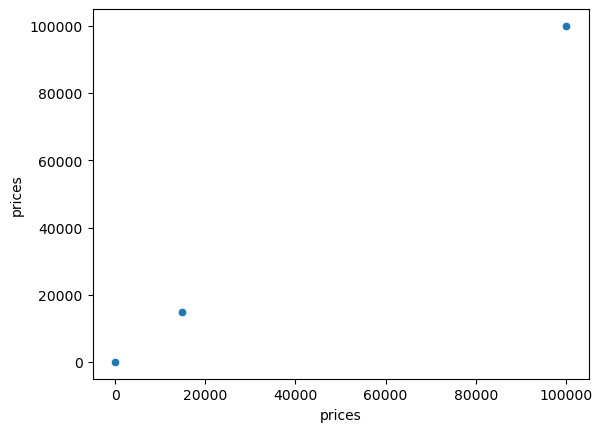

In [17]:
# Create scatterplot of prices 
sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [18]:
# Investigate the item around $20,000
df_combined.loc[df_combined['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,14900.0,High-Range Product,Regularly Busy,Most Orders,40,Loyal Customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,14900.0,High-Range Product,Regularly Busy,Most Orders,40,Loyal Customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,14900.0,High-Range Product,Regularly Busy,Average Orders,4,New Customer,1154.792308,High Spender,11.5,Regular Customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,14900.0,High-Range Product,Busiest Days,Average Orders,4,New Customer,1154.792308,High Spender,11.5,Regular Customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,14900.0,High-Range Product,Busiest Days,Average Orders,16,Regular Customer,114.426619,High Spender,20.0,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,99999.0,High-Range Product,Busiest Days,Average Orders,39,Loyal Customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,99999.0,High-Range Product,Busiest Days,Average Orders,39,Loyal Customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,99999.0,High-Range Product,Least Busy,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,99999.0,High-Range Product,Least Busy,Average Orders,12,Regular Customer,1178.381871,High Spender,11.0,Regular Customer


In [19]:
# Mark outlier values as missing values (NaN)
df_combined.loc[df_combined['prices'] > 100, 'prices'] = np.nan

In [20]:
# Check output 
df_combined['prices'].max()

25.0

In [21]:
# Export cleaned df 
df_combined.to_pickle(os.path.join(path, '02 Data','Prepared Data','4.9_df_cleaned.pkl'))

<AxesSubplot:ylabel='Frequency'>

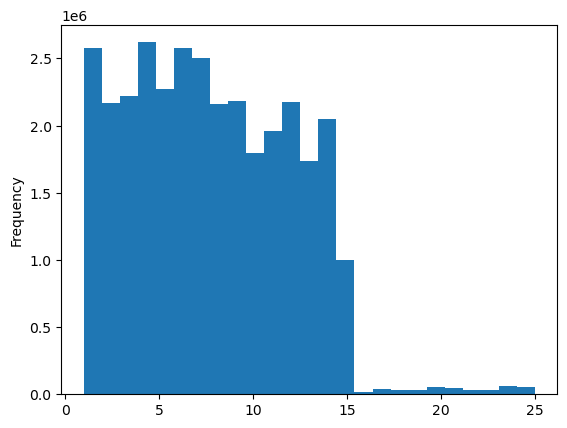

In [29]:
# Create histogram 
df_combined['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

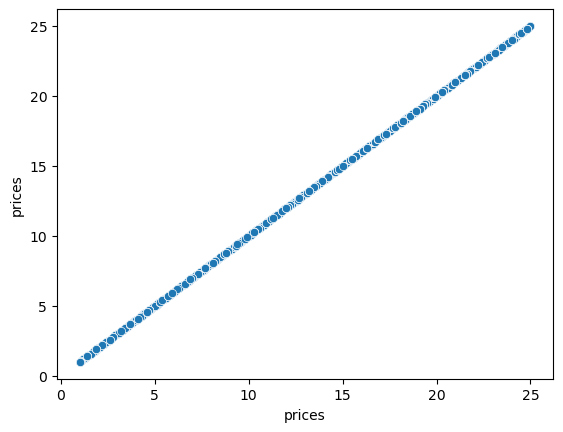

In [30]:
sns.scatterplot(x = 'prices', y = 'prices', data =df_combined)

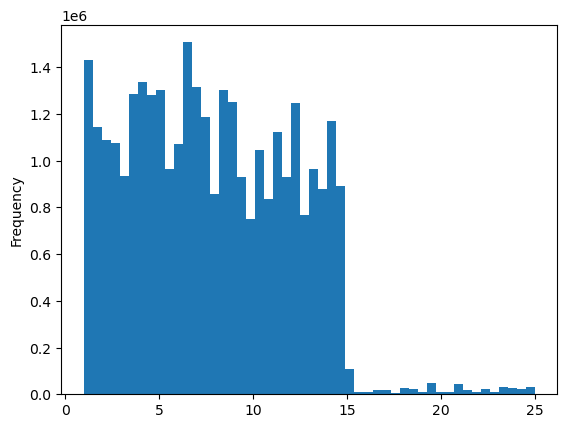

In [34]:
# Define hist
hist = df_combined['prices'].plot.hist(bins = 50)

In [33]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_hist.png'))

In [36]:
# Create subset with 2,000,000 records 
df_subset = df_combined[:2000000]

In [37]:
# Create a list holding True/False values to test the np.random.rand() <= 0.7 
np.random.seed(4) 
dev = np.random.rand(len(df_combined)) <= 0.7

In [38]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [40]:
np.random.rand(20)

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ,
       0.99588525, 0.68895442, 0.9491469 , 0.63012328, 0.9192488 ,
       0.87788077, 0.3936537 , 0.64745848, 0.73786691, 0.61518855])

In [41]:
# Store 70% of the sample in the dataframe 'big'
# Store 30% of the sample in the dataframe 'small'
big = df_combined[dev] 
small = df_combined[~dev]

In [42]:
# Check output 
len(df_combined)

32404859

In [43]:
len(big) + len(small)

32404859

In [44]:
df_2 = small[['order_day_of_week','prices']]

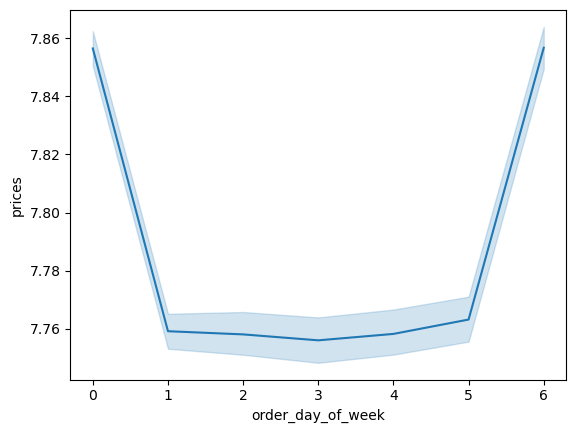

In [45]:
# Create line chart 
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [46]:
# Export line chart 
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_line.png'))